In [1]:
import pandas as pd

In [2]:
f = pd.read_csv("combine_data.csv", parse_dates=["datetime"], index_col="datetime")

In [3]:
f

,HomeTeamProb,AwayTeamProb,AwayTeam,HomeTeam,HomeTeamHasWon,ConsensusHomeMoneyLine,ConsensusAwayMoneyLine
datetime,,,,,,,
2019-01-02,0.671360,0.328640,DAL,CHO,False,-117.0,107.0
2019-01-02,0.421730,0.578270,MIA,CLE,False,210.0,-230.0
2019-01-02,0.724603,0.275397,ATL,WAS,True,-240.0,220.0
2019-01-02,0.536187,0.463813,NOP,BRK,True,115.0,-125.0
2019-01-02,0.552163,0.447837,ORL,CHI,False,102.0,-112.0
...,...,...,...,...,...,...,...
2022-03-27,0.347830,0.652170,GSW,WAS,True,226.0,-281.0
2022-03-27,0.766541,0.233459,MIN,BOS,True,-259.0,208.0
2022-03-27,0.755368,0.244632,LAL,NOP,True,-173.0,143.0


In [4]:
f.columns

Index(['HomeTeamProb', 'AwayTeamProb', 'AwayTeam', 'HomeTeam',
       'HomeTeamHasWon', 'ConsensusHomeMoneyLine', 'ConsensusAwayMoneyLine'],
      dtype='object')

In [5]:
def calc_winprob(odds):
    if odds >= 0:
        return round(100/(odds+100), 2)
    else:
        return round(1 - 100/(-odds+100), 2)

In [6]:
f.loc[:, "ActualHomeWinProb"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(calc_winprob)
f.loc[:, "ActualAwayWinProb"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(calc_winprob)

In [7]:
f

,HomeTeamProb,AwayTeamProb,AwayTeam,HomeTeam,HomeTeamHasWon,ConsensusHomeMoneyLine,ConsensusAwayMoneyLine,ActualHomeWinProb,ActualAwayWinProb
datetime,,,,,,,,,
2019-01-02,0.671360,0.328640,DAL,CHO,False,-117.0,107.0,0.54,0.48
2019-01-02,0.421730,0.578270,MIA,CLE,False,210.0,-230.0,0.32,0.70
2019-01-02,0.724603,0.275397,ATL,WAS,True,-240.0,220.0,0.71,0.31
2019-01-02,0.536187,0.463813,NOP,BRK,True,115.0,-125.0,0.47,0.56
2019-01-02,0.552163,0.447837,ORL,CHI,False,102.0,-112.0,0.50,0.53
...,...,...,...,...,...,...,...,...,...
2022-03-27,0.347830,0.652170,GSW,WAS,True,226.0,-281.0,0.31,0.74
2022-03-27,0.766541,0.233459,MIN,BOS,True,-259.0,208.0,0.72,0.32
2022-03-27,0.755368,0.244632,LAL,NOP,True,-173.0,143.0,0.63,0.41


In [8]:
f.columns

Index(['HomeTeamProb', 'AwayTeamProb', 'AwayTeam', 'HomeTeam',
       'HomeTeamHasWon', 'ConsensusHomeMoneyLine', 'ConsensusAwayMoneyLine',
       'ActualHomeWinProb', 'ActualAwayWinProb'],
      dtype='object')

# strategy one: invest a team for 0.2 dollar if probability shows that team a win

In [9]:
import numpy as np

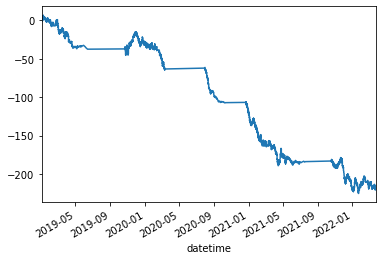

In [13]:
f.loc[:, "InvestHome"] = f.loc[:, "HomeTeamProb"].apply(lambda x: 1 if x>0.5 else 0)

f.loc[:, "InvestAway"] = f.loc[:, "AwayTeamProb"].apply(lambda x: 1 if x>0.5 else 0)

f.loc[:, "home_bet_win_result"] = f.loc[:, "HomeTeamHasWon"]
f.loc[:, "home_bet_lose_result"] = abs(f.loc[:, "HomeTeamHasWon"]-1)


f.loc[:, "away_bet_win_result"] = abs(f.loc[:, "HomeTeamHasWon"] - 1)
f.loc[:, "away_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"]

f.loc[:, "home_win_total"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

f.loc[:, "away_win_total"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "home_lose_total"] = -1

f.loc[:, "away_lose_total"] = -1

f.loc[:, "home_bet_earning"] = f.loc[:, "home_bet_win_result"] * f.loc[:, "home_win_total"] * f.loc[:, "InvestHome"] + f.loc[:, "home_bet_lose_result"] * f.loc[:, "home_lose_total"] * f.loc[:, "InvestHome"]

f.loc[:, "away_bet_earning"] = f.loc[:, "away_bet_win_result"] * f.loc[:, "away_win_total"] * f.loc[:, "InvestAway"] + f.loc[:, "away_bet_lose_result"] * f.loc[:, "away_lose_total"] * f.loc[:, "InvestAway"]

f.loc[:, "bet_earning_sum"] =  f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

f.loc[:, "bet_earning_cum_sum"].plot()

#print("average investment per game= {}".format(np.mean(f.loc[:, "InvestHome"].mean())))

In [14]:
f.to_csv("result_strategy1.csv")

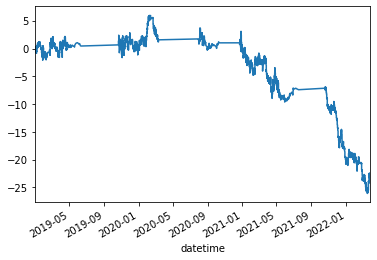

In [12]:
f.loc[:, "kellyHome"] = (((1 - f.loc[:, "ActualHomeWinProb"]) / f.loc[:, "ActualHomeWinProb"]) * f.loc[:, "HomeTeamProb"] - (1 - f.loc[:, "HomeTeamProb"])) / (
                    (1 - f.loc[:, "ActualHomeWinProb"]) / f.loc[:, "ActualHomeWinProb"])

f.loc[:, "kellyAway"] = (((1 - f.loc[:, "ActualAwayWinProb"]) / f.loc[:, "ActualAwayWinProb"]) * f.loc[:, "AwayTeamProb"] - (1 - f.loc[:, "AwayTeamProb"])) / (
                    (1 - f.loc[:, "ActualAwayWinProb"]) / f.loc[:, "ActualAwayWinProb"])



f.loc[:, "kellyHome"] = f.loc[:, "kellyHome"].apply(lambda x: x if x > 0.0 else 0)
f.loc[:, "kellyAway"] = f.loc[:, "kellyAway"].apply(lambda x: x if x > 0.0 else 0)
#f.loc[:, "kellyHome"] = f.loc[:, "kellyHome"].apply(lambda x: 0.2 if x > 0.2 else x)
#f.loc[:, "kellyAway"] = f.loc[:, "kellyAway"].apply(lambda x: 0.2 if x > 0.2 else x)

f.loc[:, "home_bet_win_result"] = f.loc[:, "HomeTeamHasWon"]
f.loc[:, "home_bet_lose_result"] = abs(f.loc[:, "HomeTeamHasWon"]-1)


f.loc[:, "away_bet_win_result"] = abs(f.loc[:, "HomeTeamHasWon"] - 1)
f.loc[:, "away_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"]

f.loc[:, "home_win_total"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

f.loc[:, "away_win_total"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "home_lose_total"] = -1

f.loc[:, "away_lose_total"] = -1



f.loc[:, "home_bet_earning"] = f.loc[:, "home_bet_win_result"] * f.loc[:, "home_win_total"] * f.loc[:, "kellyHome"] + f.loc[:, "home_bet_lose_result"] * f.loc[:, "home_lose_total"] * f.loc[:, "kellyHome"]

f.loc[:, "away_bet_earning"] = f.loc[:, "away_bet_win_result"] * f.loc[:, "away_win_total"] * f.loc[:, "kellyAway"] + f.loc[:, "away_bet_lose_result"] * f.loc[:, "away_lose_total"] * f.loc[:, "kellyAway"]

f.loc[:, "bet_earning_sum"] =  f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

f.loc[:, "bet_earning_cum_sum"].plot()




In [52]:
len(f)

4193

In [ ]:
im

In [49]:
f.loc[:, "kellyHome"].mean()

0.1279431506276686

In [45]:
f.to_csv("result_kelly.csv")

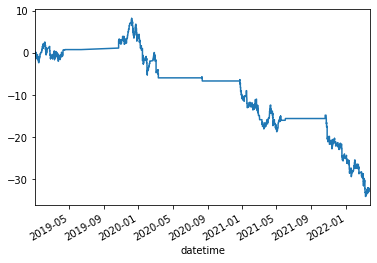

In [91]:
f.loc[:, "kellyHome"] = f.loc[:, "HomeTeamProb"].apply(lambda x: 1 if x>0.8 else 0)

f.loc[:, "kellyAway"] = f.loc[:, "AwayTeamProb"].apply(lambda x: 1 if x>0.8 else 0)

f.loc[:, "home_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)
f.loc[:, "home_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)


f.loc[:, "away_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)
f.loc[:, "away_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)

f.loc[:, "home_win_total"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

f.loc[:, "away_win_total"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "home_lose_total"] = -1

f.loc[:, "away_lose_total"] = -1



f.loc[:, "home_bet_earning"] = f.loc[:, "home_bet_win_result"] * f.loc[:, "home_win_total"] * f.loc[:, "kellyHome"] + f.loc[:, "home_bet_lose_result"] * f.loc[:, "home_lose_total"] * f.loc[:, "kellyHome"]

f.loc[:, "away_bet_earning"] = f.loc[:, "away_bet_win_result"] * f.loc[:, "away_win_total"] * f.loc[:, "kellyAway"] + f.loc[:, "away_bet_lose_result"] * f.loc[:, "away_lose_total"] * f.loc[:, "kellyAway"]

f.loc[:, "bet_earning_sum"] =  f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

f.loc[:, "bet_earning_cum_sum"].plot()





In [63]:
f.columns

Index(['HomeTeamProb', 'AwayTeamProb', 'AwayTeam', 'HomeTeam',
       'HomeTeamHasWon', 'ConsensusHomeMoneyLine', 'ConsensusAwayMoneyLine',
       'ActualHomeWinProb', 'ActualAwayWinProb', 'kellyHome', 'kellyAway',
       'home_bet_win_result', 'home_bet_lose_result', 'away_bet_win_result',
       'away_bet_lose_result', 'home_win_total', 'away_win_total',
       'home_lose_total', 'away_lose_total', 'home_bet_earning',
       'away_bet_earning', 'bet_earning_sum', 'bet_earning_cum_sum'],
      dtype='object')

In [64]:
f.describe()

,HomeTeamProb,AwayTeamProb,ConsensusHomeMoneyLine,ConsensusAwayMoneyLine,ActualHomeWinProb,ActualAwayWinProb,kellyHome,kellyAway,home_bet_win_result,home_bet_lose_result,away_bet_win_result,away_bet_lose_result,home_win_total,away_win_total,home_lose_total,away_lose_total,home_bet_earning,away_bet_earning,bet_earning_sum,bet_earning_cum_sum
count,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000,4193.000000
mean,0.616476,0.383524,-162.839256,67.033627,0.583637,0.457572,0.734796,0.265204,0.551634,0.448366,0.448366,0.551634,1.051740,1.905691,-0.734796,-0.265204,-0.044312,-0.007889,-0.052201,-112.287932
std,0.177444,0.177444,447.905005,337.188757,0.202803,0.203287,0.441494,0.441494,0.497386,0.497386,0.497386,0.497386,1.156518,2.029686,0.441494,0.441494,0.677799,0.386988,0.780046,80.279525
min,0.098624,0.036365,-7500.000000,-1800.000000,0.070000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.055556,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-224.972705
25%,0.491178,0.244199,-286.000000,-157.000000,0.430000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.349650,0.636943,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-185.166809
50%,0.636116,0.363884,-147.000000,124.000000,0.600000,0.450000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.680272,1.240000,-1.000000,0.000000,0.000000,0.000000,0.210084,-134.376777
75%,0.755801,0.508822,133.000000,234.000000,0.740000,0.610000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.330000,2.340000,0.000000,0.000000,0.373134,0.000000,0.497512,-30.214082
max,0.963635,0.901376,1400.000000,1800.000000,0.990000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,18.000000,0.000000,0.000000,5.880000,4.270000,5.880000,6.570217


In [15]:
f.columns

Index(['HomeTeamProb', 'AwayTeamProb', 'AwayTeam', 'HomeTeam',
       'HomeTeamHasWon', 'ConsensusHomeMoneyLine', 'ConsensusAwayMoneyLine',
       'ActualHomeWinProb', 'ActualAwayWinProb', 'InvestHome', 'InvestAway',
       'home_bet_win_result', 'home_bet_lose_result', 'away_bet_win_result',
       'away_bet_lose_result', 'home_win_total', 'away_win_total',
       'home_lose_total', 'away_lose_total', 'home_bet_earning',
       'away_bet_earning', 'bet_earning_sum', 'bet_earning_cum_sum',
       'kellyHome', 'kellyAway'],
      dtype='object')